In [117]:
import numpy as np
from skimage.io import MultiImage
import tifffile as tiff
import matplotlib.pyplot as plt
from skimage import filters
from skimage.morphology import dilation, closing, square

### What's in the tiff files

In [2]:
img_path = './data/train_images/0005f7aaab2800f6170c399693a96917.tiff'
mask_path = './data/train_label_masks/0005f7aaab2800f6170c399693a96917_mask.tiff'

In [14]:
tiff_img = tiff.imread(img_path)

In [15]:
tiff_img.shape

(29440, 27648, 3)

In [16]:
tiff_img.dtype

dtype('uint8')

In [103]:
mask = MultiImage(mask_path)
print('frames: ', [f.shape for f in mask])

frames:  [(29440, 27648, 3), (7360, 6912, 3), (1840, 1728, 3)]


In [113]:
mask_large = mask[0][:,:,0]  # mask has 3 channels but only channel 0 is used
mask_small = mask[2][:,:,0]

In [109]:
mask_small.nonzero()

(array([ 200,  201,  201, ..., 1543, 1543, 1543]),
 array([243, 242, 243, ..., 314, 315, 316]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [5]:
img = MultiImage(img_path)

In [7]:
for frame in img:
    print(frame.shape)

(29440, 27648, 3)
(7360, 6912, 3)
(1840, 1728, 3)


In [10]:
img.data[0].shape

(1840, 1728, 3)

In [13]:
img.data[0].dtype

dtype('uint8')

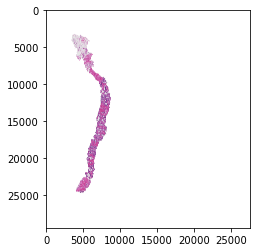

In [18]:
plt.imshow(tiff_img)

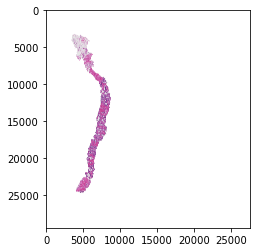

In [20]:
plt.imshow(img[0]);

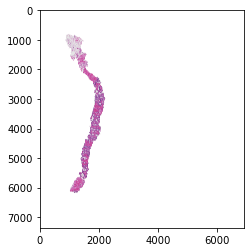

In [21]:
plt.imshow(img[1]);

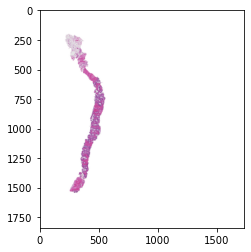

In [19]:
plt.imshow(img[2]);

Magnification across the tiff:

In [24]:
shapes[0][0] / shapes[1][0]

4.0

In [25]:
shapes[0][0] / shapes[2][0]

16.0

### Find a slice and view the resolution differences

In [26]:
img_small = img[2]
img_small.shape

(1840, 1728, 3)

In [32]:
img_large = img[0]
img_large.shape

(29440, 27648, 3)

In [97]:
def slice_bottom_small(img):
    return img[1500 - 64: 1500 + 64, 250 : 250 + 128]

def slice_top_small(img):
    return img[250 : 250 + 128, 250 : 250 + 128]

In [85]:
# relative coords
x0_bottom = (1500 - 64) / img_small.shape[0]
y0_bottom = 250 / img_small.shape[1]
print('bottom: ', x0_bottom, y0_bottom)

x0_top = 250 / img_small.shape[0]
y0_top = 250 / img_small.shape[1]

bottom:  0.7804347826086957 0.14467592592592593


In [98]:
def slice_bottom_large(img, x0=x0_bottom, y0=y0_bottom):
    return img[int(x0 * img.shape[0]) : int(x0 * img.shape[0] + 128 * 16),
               int(y0 * img.shape[1]) : int(y0 * img.shape[0] + 128 * 16)]

def slice_top_large(img, x0=x0_top, y0=y0_top):
    return img[int(x0 * img.shape[0]) : int(x0 * img.shape[0] + 128 * 16),
               int(y0 * img.shape[1]) : int(y0 * img.shape[0] + 128 * 16)]

In [99]:
img_small_bottom = slice_bottom_small(img_small)
img_small_top = slice_top_small(img_small)

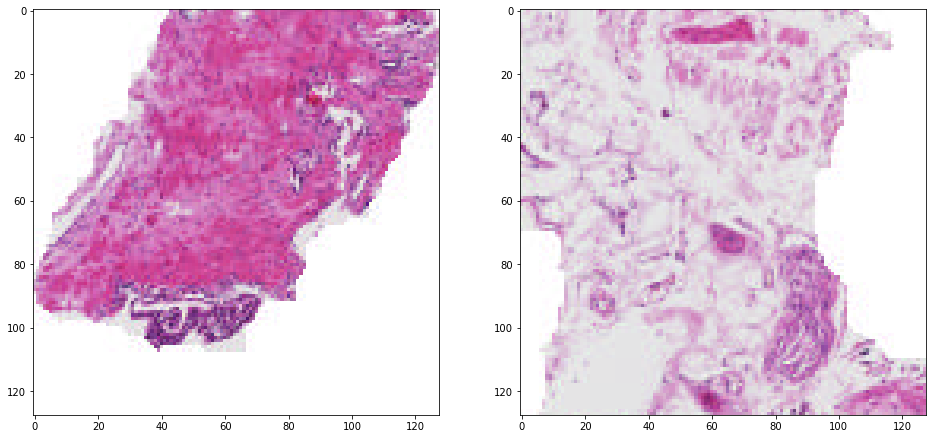

In [100]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img_small_bottom)
plt.subplot(1,2,2)
plt.imshow(img_small_top);

In [89]:
img_large_bottom = slice_bottom_large(img_large)
img_large_top    = slice_top_large(img_large)

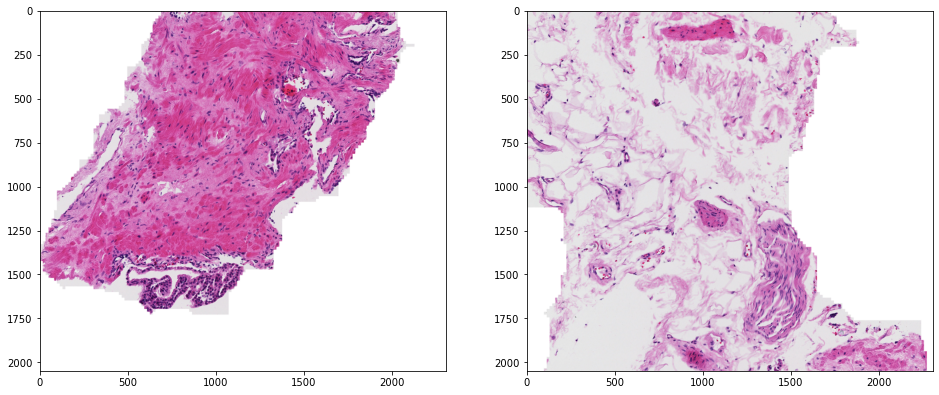

In [90]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img_large_bottom)
plt.subplot(1,2,2)
plt.imshow(img_large_top);

### Inspect the pixel values of the slices

In [79]:
img_small_bottom[:,:,0]  # background is white; value 255

array([[255, 255, 255, ..., 227, 230, 255],
       [255, 255, 255, ..., 206, 226, 255],
       [255, 255, 255, ..., 200, 219, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### View the mask provided

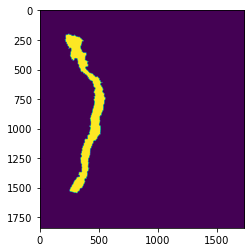

In [114]:
plt.imshow(mask_small);

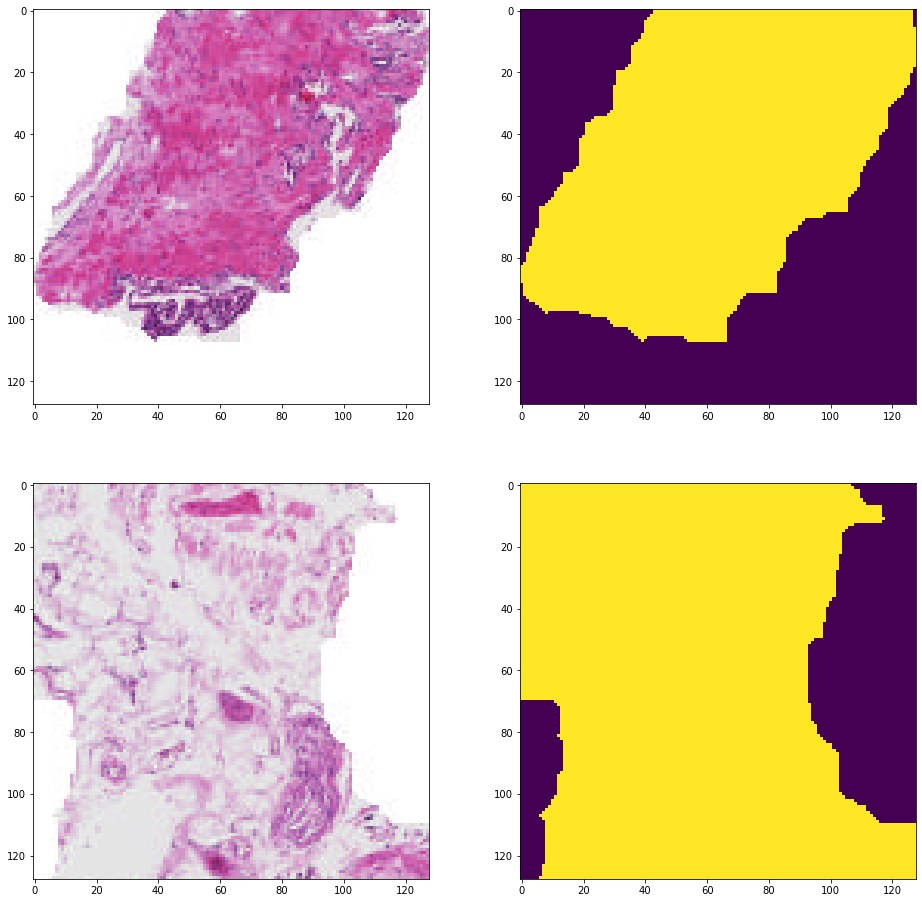

In [115]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(img_small_bottom)
plt.subplot(2,2,2)
plt.imshow(slice_bottom_small(mask_small))
plt.subplot(2,2,3)
plt.imshow(img_small_top)
plt.subplot(2,2,4)
plt.imshow(slice_top_small(mask_small));

### Otsu thresholding

In [130]:
val = filters.threshold_otsu(img_small.mean(2).astype(int))
img_small_mask = img_small.mean(2) < val

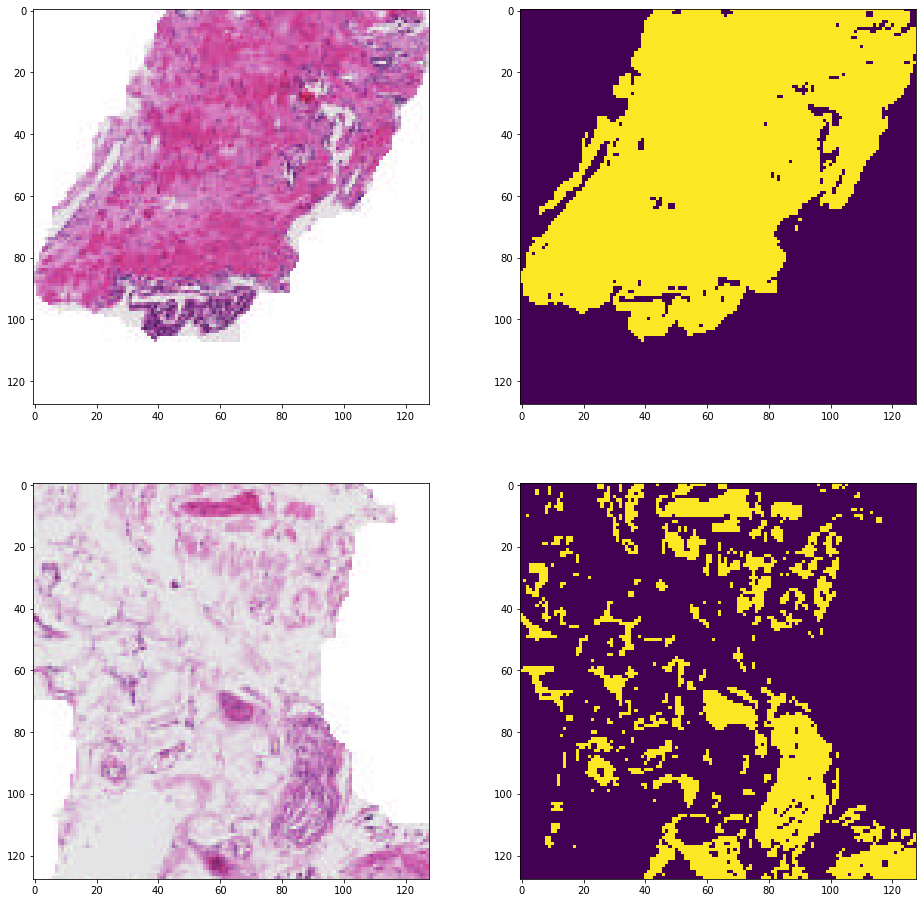

In [128]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(img_small_bottom)
plt.subplot(2,2,2)
plt.imshow(slice_bottom_small(img_small_mask))
plt.subplot(2,2,3)
plt.imshow(img_small_top)
plt.subplot(2,2,4)
plt.imshow(slice_top_small(img_small_mask));

#### Morphometry on the masks

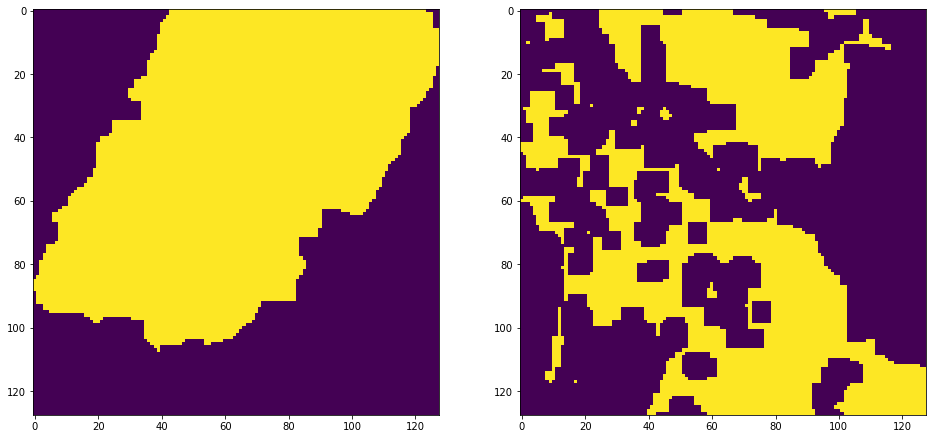

In [120]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(closing(slice_bottom_small(img_small_mask), square(6)))
plt.subplot(1,2,2)
plt.imshow(closing(slice_top_small(img_small_mask), square(6)));

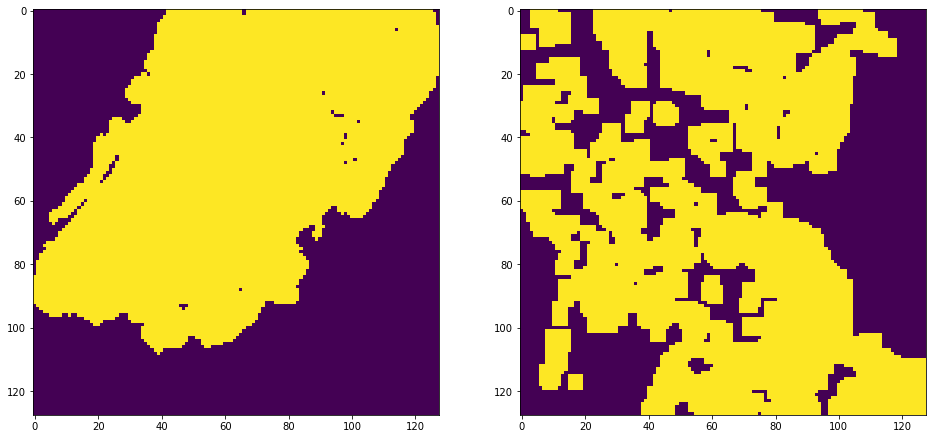

In [126]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(dilation(slice_bottom_small(img_small_mask)))
plt.subplot(1,2,2)
plt.imshow(dilation(slice_top_small(img_small_mask), square(5)));

#### % of area foreground

In [132]:
slice_bottom_small(img_small_mask).mean()

0.50506591796875

In [133]:
slice_top_small(img_small_mask).mean()

0.216796875

In [135]:
closing(slice_top_small(img_small_mask), square(5)).mean()

0.35443115234375

In [136]:
dilation(slice_top_small(img_small_mask), square(5)).mean()

0.6025390625

### Remove background

In [178]:
img_no_back = img_small.copy()
mask_no_back = dilation(img_small_mask, square(5))

In [181]:
img_no_back[~mask_no_back.astype(np.bool) & np.all(img_no_back == 255, axis=2), :] = 0

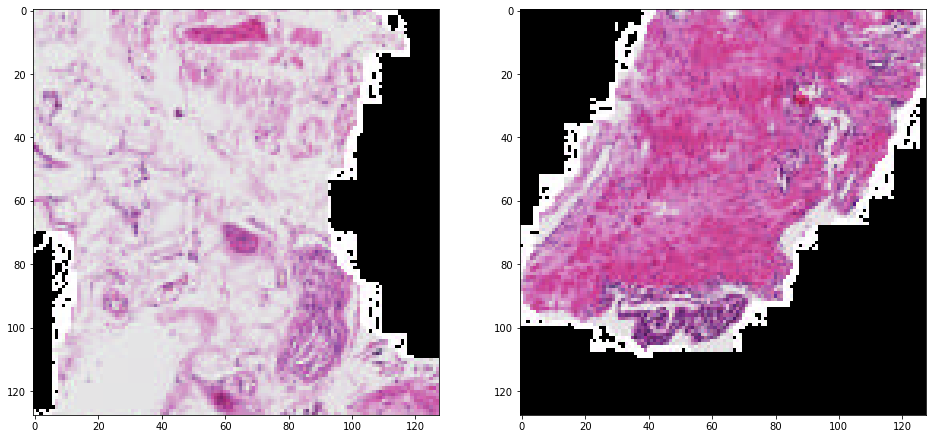

In [182]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(slice_top_small(img_no_back))
plt.subplot(1,2,2)
plt.imshow(slice_bottom_small(img_no_back));